# <center><strong>Obesity risk</strong></center>

###### **By Mohamed Jamyl**

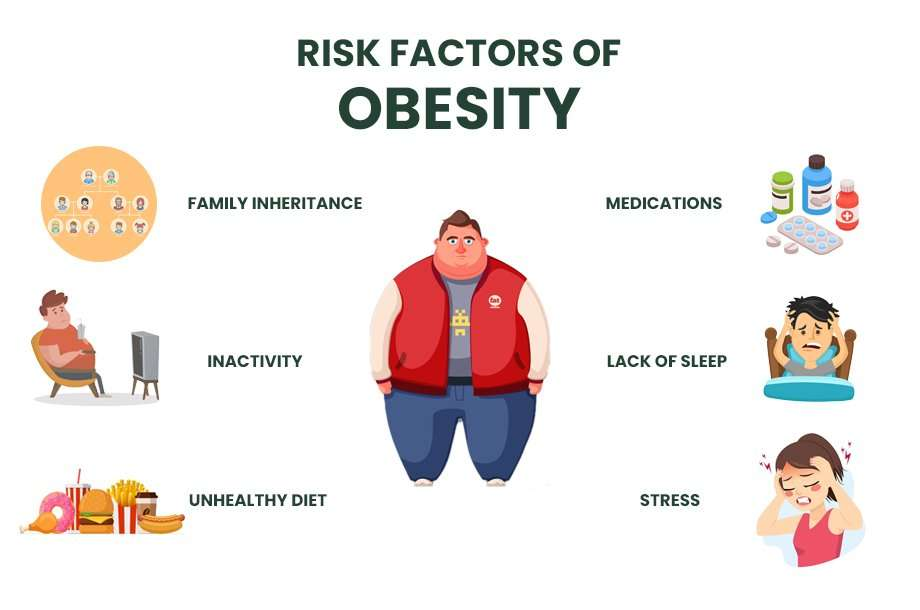

In [1]:
from IPython.display import Image
Image(filename='obe.jpg')

## <center><strong>Project Overview </strong></center>

### This Kaggle dataset provides comprehensive information on individuals, encompassing key attributes such as gender, age, height, weight, family history with overweight, dietary habits, physical activity, transportation mode, and the corresponding obesity level. The dataset is meticulously curated for research and analysis in the domain of health and lifestyle studies.nting obesity level)

### Gender
### Age
### Height
### Weight
### Family_history_with_overweight
### FAVC (Frequent consumption of high-caloric food)
### FCVC (Frequency of consumption of vegetables)
### NCP (Number of main meals)
### CAEC (Consumption of food between meals)
### SMOKE
### CH2O (Daily water consumption)
### SCC (Caloric beverages consumption)
### FAF (Physical activity frequency)
### TUE (Time spent using technological devices)
### CALC (Consumption of alcohol)
### MTRANS (Mode of transportation)
### 0be1dad (Target variable representing obesity level)

--------------------------------------
--------------------------------------
--------------------------------------

## **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import LabelEncoder,StandardScaler
# from sklearn.metrics import classification_report


# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB 


import warnings
warnings.filterwarnings('ignore')

--------------------------------
--------------------------------
-------------------------------

## **Exploratory Data Analysis (EDA)**

### **Initial Data Understanding**

 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

In [3]:
train_df= pd.read_csv('train_obesity.csv')
test_df= pd.read_csv('test_obesity.csv')

In [4]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
train_df.sample(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
4709,4709,Female,17.000000,1.600000,55.000000,yes,yes,3.000000,4.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_I
10154,10154,Male,31.783524,1.836592,92.508122,yes,yes,2.000000,2.604998,Sometimes,no,1.146595,no,1.992719,0.153669,Sometimes,Automobile,Overweight_Level_II
3700,3700,Female,18.000000,1.600000,53.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
5533,5533,Female,26.000000,1.624576,110.777391,yes,yes,3.000000,3.000000,Sometimes,no,2.618198,no,0.000000,0.380695,Sometimes,Public_Transportation,Obesity_Type_III
2669,2669,Female,26.000000,1.694952,106.491410,yes,yes,3.000000,3.000000,Sometimes,no,2.569713,no,0.000000,0.795685,Sometimes,Public_Transportation,Obesity_Type_III
18126,18126,Male,27.394123,1.756550,118.533246,yes,yes,2.938616,3.000000,Sometimes,no,2.043703,no,0.642350,0.079673,Sometimes,Automobile,Obesity_Type_II
4677,4677,Male,31.641081,1.754218,119.373019,yes,yes,2.927187,2.993623,Sometimes,no,1.981782,no,1.612741,0.631217,Sometimes,Automobile,Obesity_Type_II
898,898,Female,26.000000,1.630927,111.235188,yes,yes,3.000000,3.000000,Sometimes,no,2.720050,no,0.000000,0.357314,Sometimes,Public_Transportation,Obesity_Type_III
20410,20410,Male,23.000000,1.859717,120.901591,yes,yes,2.576449,2.961192,Sometimes,no,1.797161,no,1.117311,0.504176,Sometimes,Public_Transportation,Obesity_Type_II
10918,10918,Male,25.000000,1.700000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Overweight_Level_II


In [6]:
train_df.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


In [7]:
train_df.shape

(20758, 18)

In [8]:
test_df.shape

(13840, 17)

In [9]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [10]:
test_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [13]:
train_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [14]:
test_df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [15]:
train_df.duplicated().sum()

np.int64(0)

In [16]:
test_df.duplicated().sum()

np.int64(0)

----------------------------
----------------------------
----------------------------

### **Basic Statistical Overview**
- Summary Statistical : **describe()**

In [17]:
train_df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False).style.background_gradient(cmap='GnBu').bar(subset=["max"], color='#BB0000').bar(subset=["mean",], color='green') 

,count,mean,std,min,25%,50%,75%,max
id,20758.000000,10378.500000,5992.462780,0.000000,5189.250000,10378.500000,15567.750000,20757.000000
Weight,20758.000000,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
Age,20758.000000,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
FAF,20758.000000,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
NCP,20758.000000,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
CH2O,20758.000000,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
TUE,20758.000000,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000
FCVC,20758.000000,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
Height,20758.000000,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663


In [18]:
train_df.select_dtypes(include='object').describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


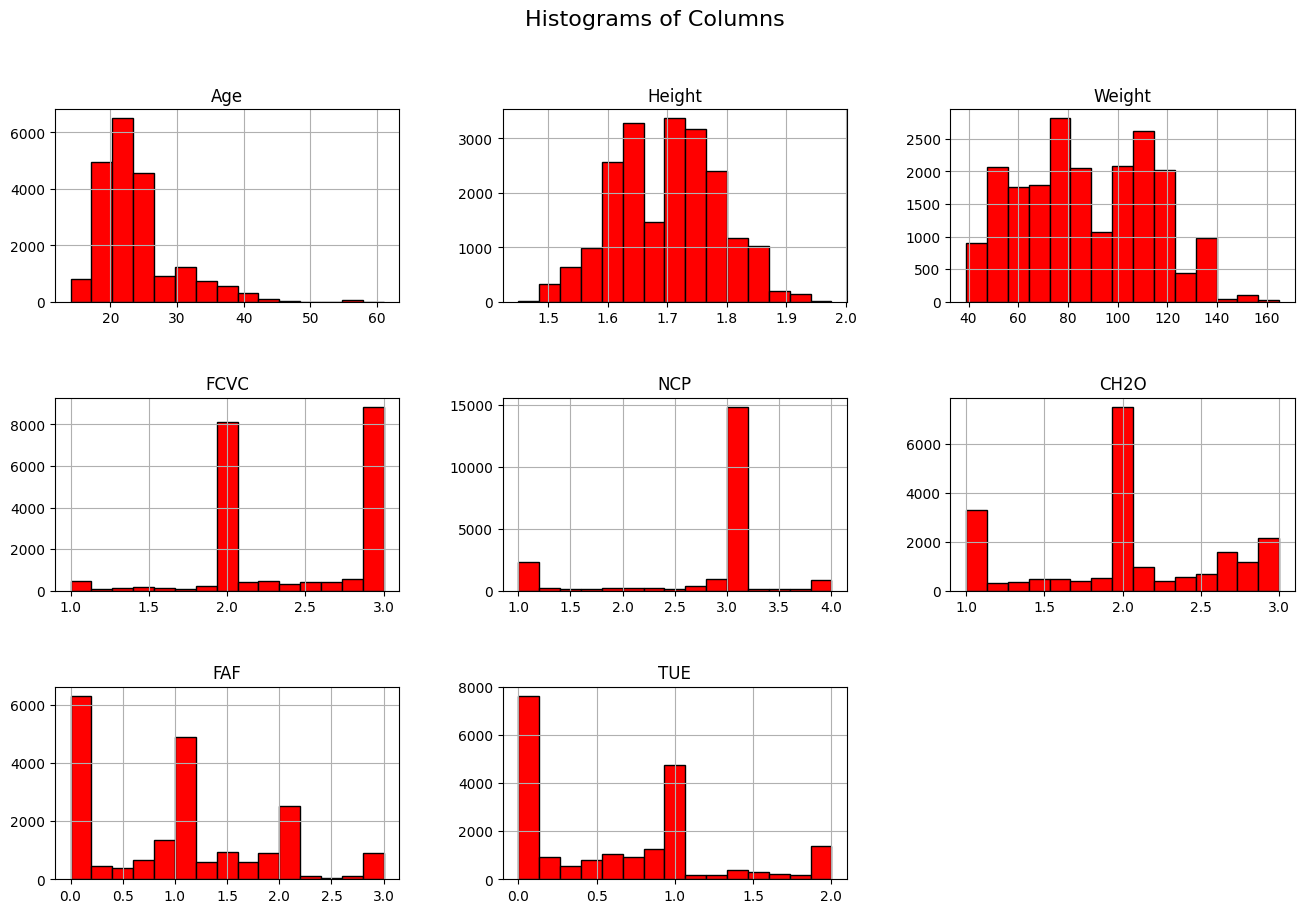

In [19]:
train_df.drop(columns='id', axis=1).hist(bins=15, figsize=(16, 10), color='red', edgecolor='black')

plt.suptitle('Histograms of Columns', fontsize=16)
plt.subplots_adjust(hspace=0.5)  
plt.show()

----------------------------

- Summary Statistical : **value_counts()**

In [20]:
train_df['Gender'].value_counts()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

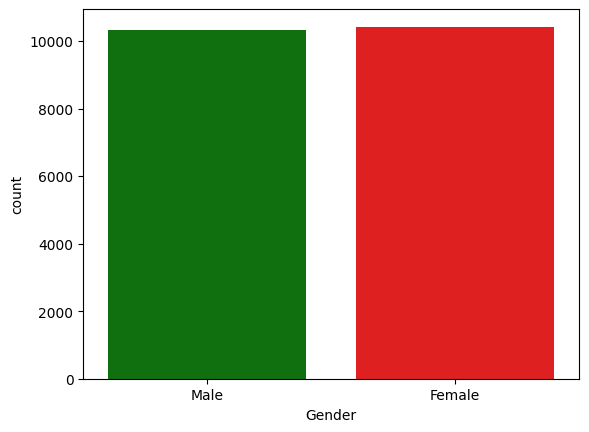

In [21]:
sns.countplot(x='Gender', data=train_df, palette=['green','red'])
plt.xlabel('Gender')
plt.show()

--------------------------

In [22]:
train_df['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

---------------------

In [23]:
train_df['FAVC'].value_counts()

FAVC
yes    18982
no      1776
Name: count, dtype: int64

-----------------------

In [24]:
train_df['CAEC'].value_counts()

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

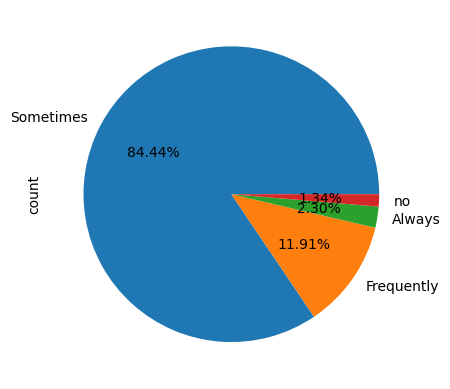

In [25]:
train_df['CAEC'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

--------------------------

In [26]:
train_df['SMOKE'].value_counts()

SMOKE
no     20513
yes      245
Name: count, dtype: int64

---------------------

In [27]:
train_df['SCC'].value_counts()

SCC
no     20071
yes      687
Name: count, dtype: int64

---------------------------

In [28]:
train_df['CALC'].value_counts()

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

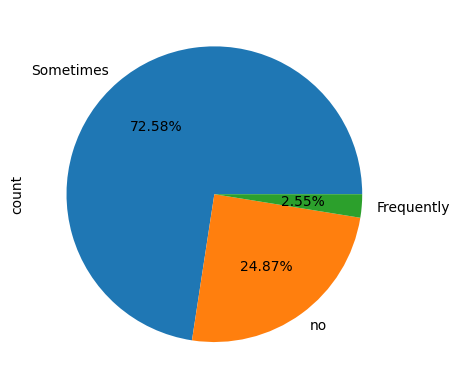

In [29]:
train_df['CALC'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

-----------------------------

In [30]:
train_df['MTRANS'].value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

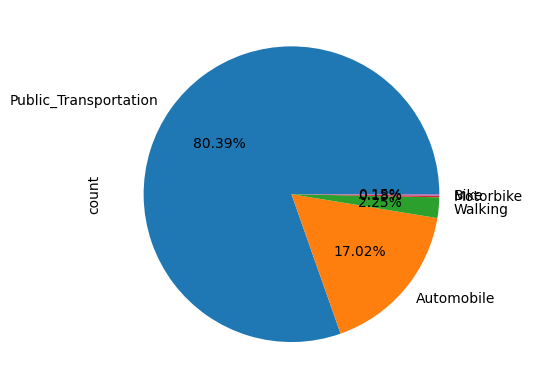

In [31]:
train_df['MTRANS'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

-------------------------

In [32]:
train_df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

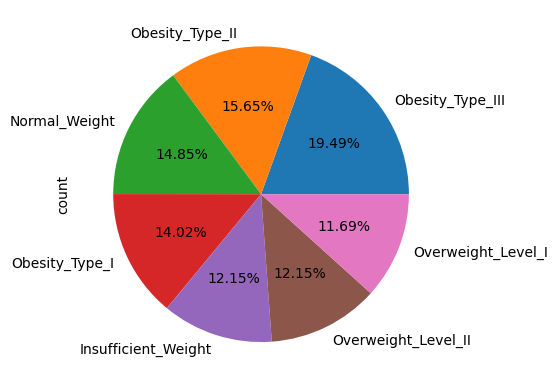

In [33]:
train_df['NObeyesdad'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

--------------------------------
------------------------------

## **Distribution of Variables**

- **Numerical Features (KDE)**

In [34]:
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


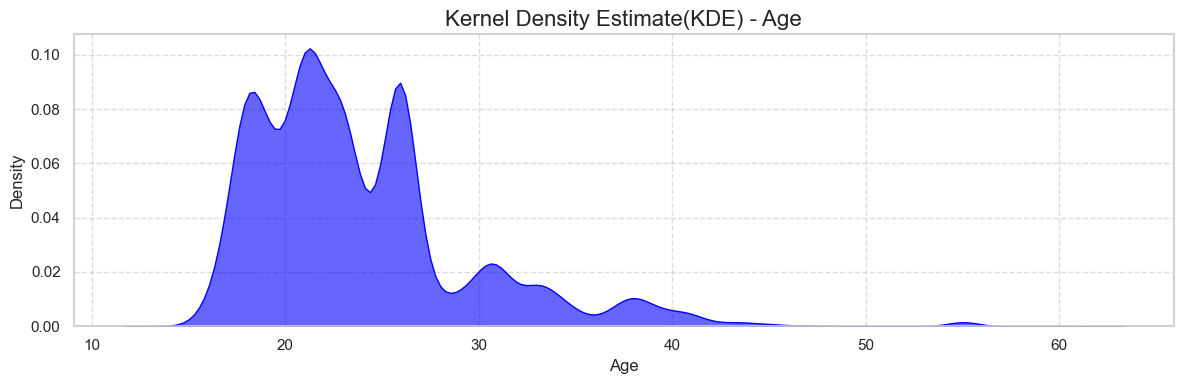

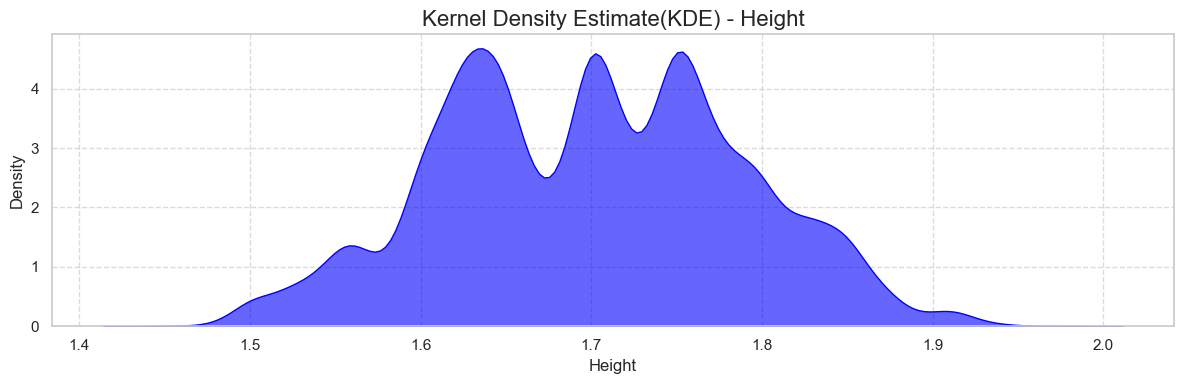

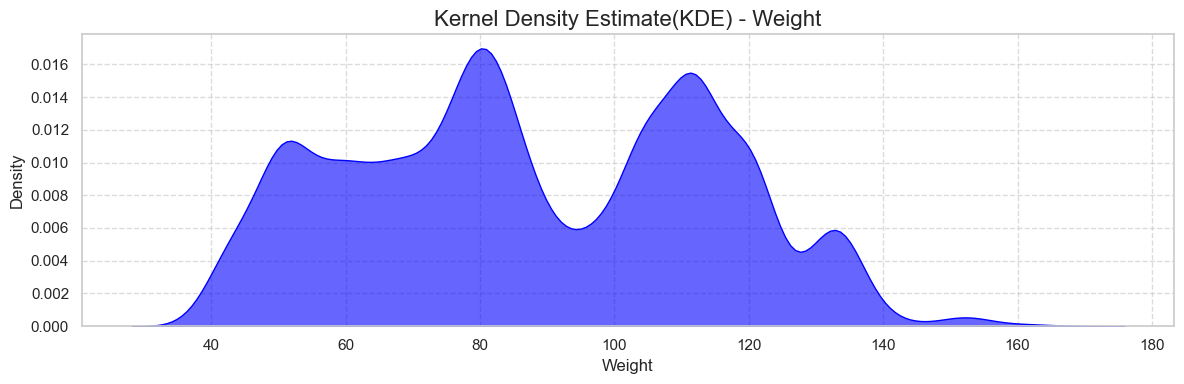

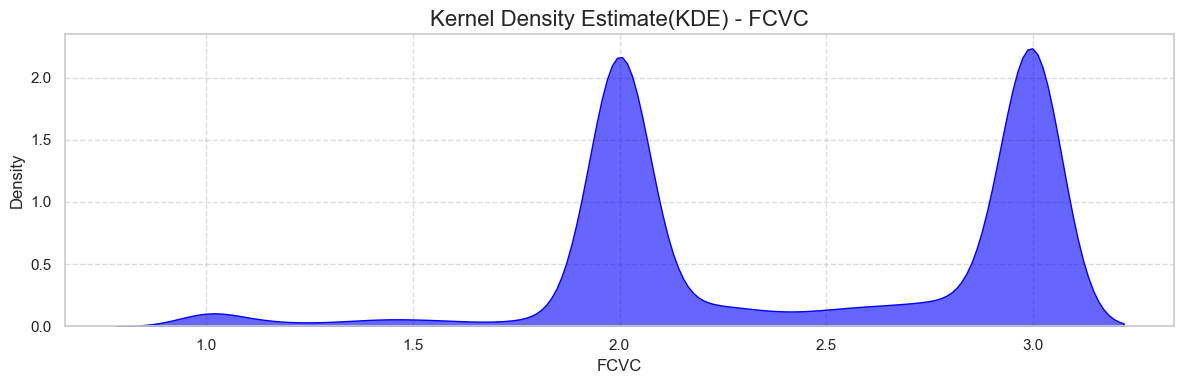

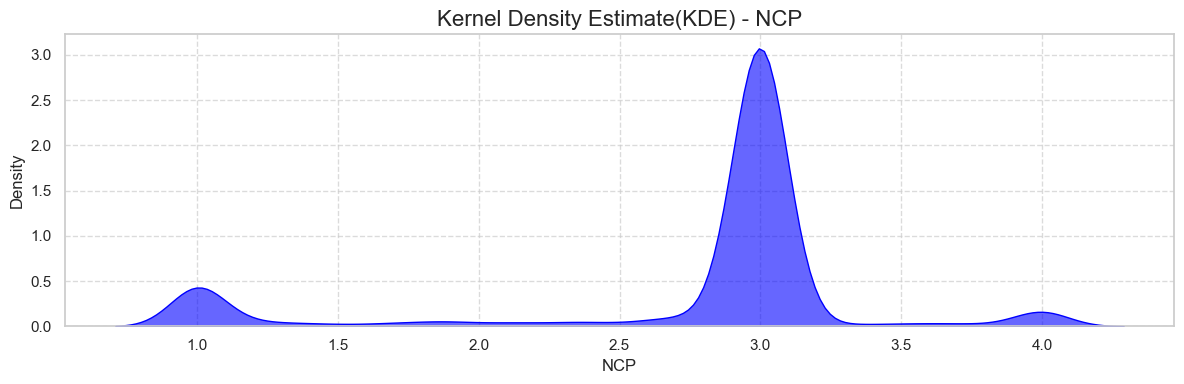

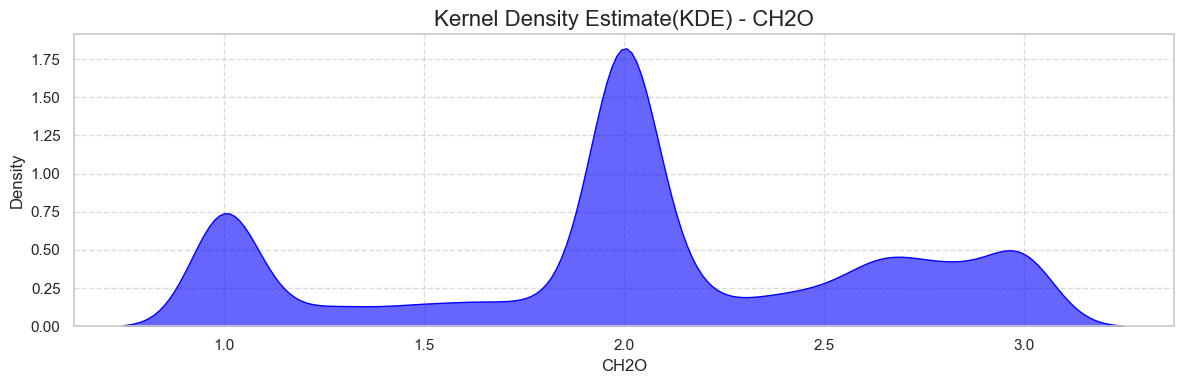

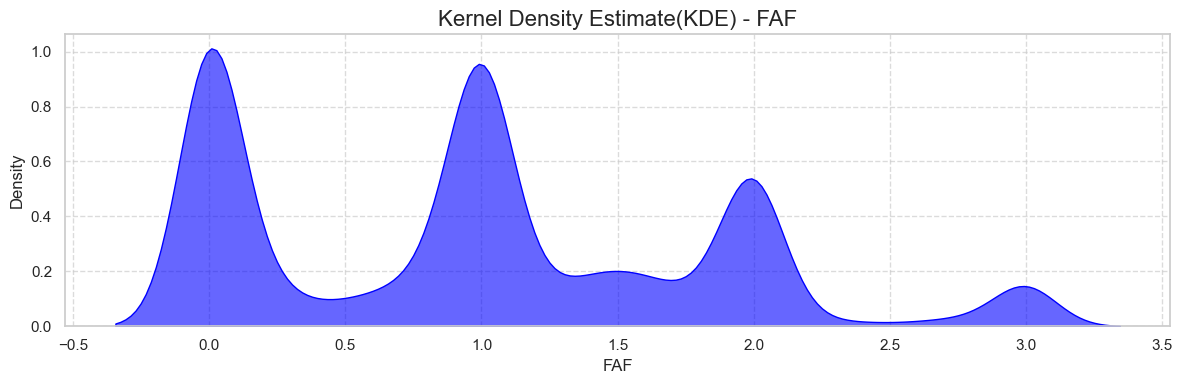

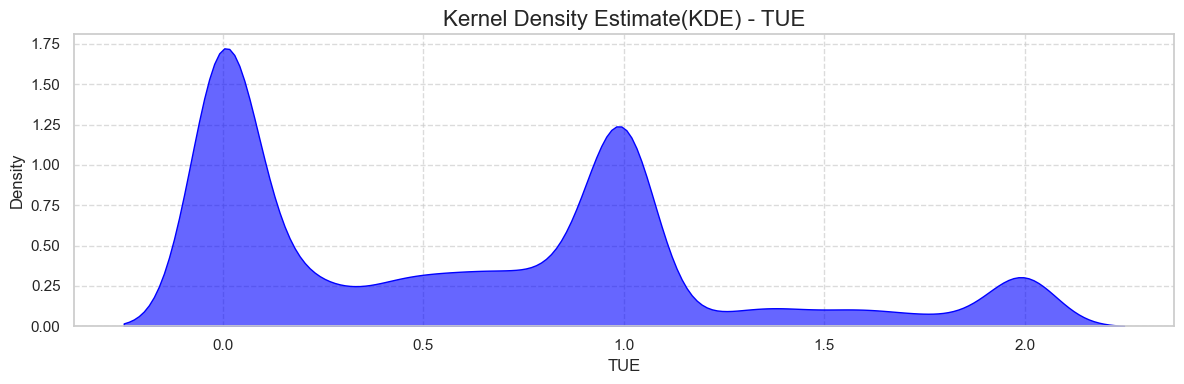

In [35]:
sns.set(style="whitegrid")
for	col	in train_df.drop(['id'],axis=1).select_dtypes('number').columns:
    plt.figure(figsize=(12,	4))
    sns.kdeplot(train_df[col], fill=True,	color='blue', alpha=0.6)
    plt.title(f'Kernel Density Estimate(KDE) - {col}',	fontsize=16)
    plt.xlabel(col,	fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

------------------------

### **Correlation**

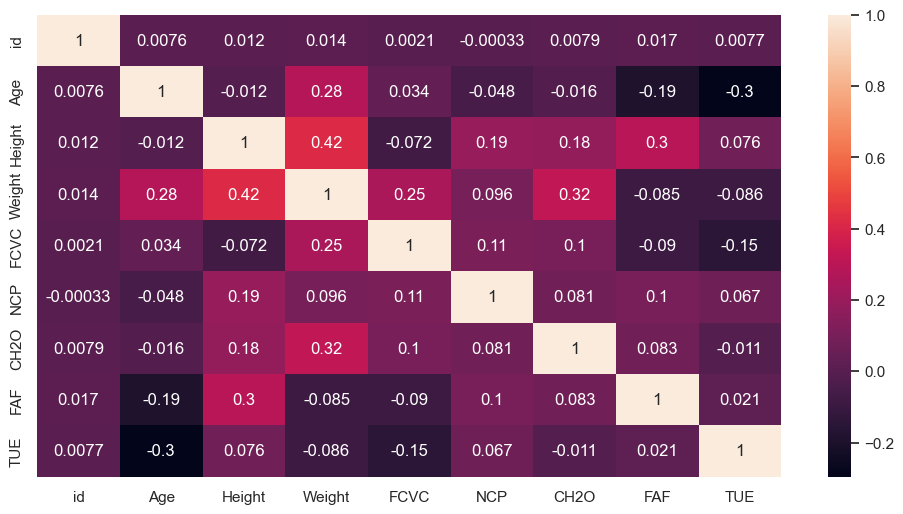

In [36]:
plt.figure(figsize=(12,	6))
sns.heatmap(train_df.select_dtypes(include='number').corr(), annot=True)
plt.show()

##### There is a high negative correlation (-0.3) between **Age** and **TUE**

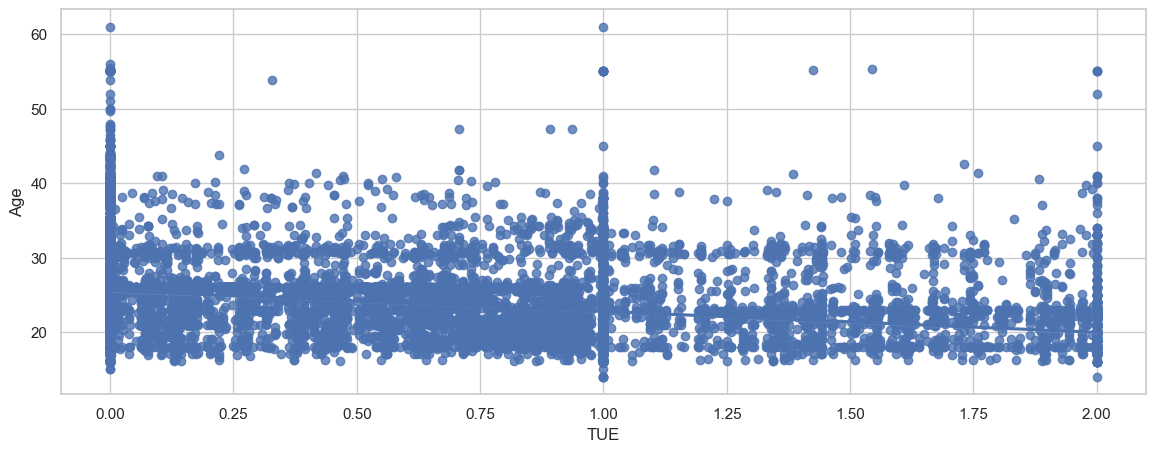

In [37]:
fig,ax = plt.subplots()
fig.set_size_inches(14, 5)
sns.regplot(x="TUE", y="Age", data=train_df,ax=ax)
plt.show()

------------------------------
-----------------------------

## **Feature Extraction**

-------------------------

In [38]:
train_df['FCVC'].value_counts()

FCVC
3.000000    7658
2.000000    7653
1.000000     275
2.967300     121
2.766612      54
            ... 
2.973499       1
2.417635       1
2.690754       1
2.099687       1
1.873716       1
Name: count, Length: 934, dtype: int64

In [39]:
test_df['FCVC'].value_counts()

FCVC
2.000000    5173
3.000000    5043
1.000000     188
2.967300      81
2.766612      40
            ... 
2.146578       1
2.094490       1
1.758599       1
2.765769       1
1.871213       1
Name: count, Length: 828, dtype: int64

##### Transform values in column **FCVC** with **round** function

In [40]:
train_df['FCVC'] = train_df['FCVC'].apply(lambda x : round(x))
test_df['FCVC'] = test_df['FCVC'].apply(lambda x : round(x))

In [41]:
train_df['FCVC'].value_counts()

FCVC
3    10092
2     9911
1      755
Name: count, dtype: int64

In [42]:
test_df['FCVC'].value_counts()

FCVC
2    6679
3    6678
1     483
Name: count, dtype: int64

#### Extracting new column **[FCVC_classes]** from **[FCVC]**

In [43]:
def fcvc(m):
    m = int(m)
    if m == 1:
        return 'Rarely consumes vegetables'
    if m == 2:
        return 'Sometimes consumes vegetables'
    if m == 3:
        return 'Regularly consumes vegetables'

train_df['FCVC_classes'] = train_df['FCVC'].apply(lambda x : fcvc(x))

In [44]:
def fcvc(m):
    m = int(m)
    if m == 1:
        return 'Rarely consumes vegetables'
    if m == 2:
        return 'Sometimes consumes vegetables'
    if m == 3:
        return 'Regularly consumes vegetables'

test_df['FCVC_classes'] = test_df['FCVC'].apply(lambda x : fcvc(x))

In [45]:
train_df['FCVC_classes'].value_counts()

FCVC_classes
Regularly consumes vegetables    10092
Sometimes consumes vegetables     9911
Rarely consumes vegetables         755
Name: count, dtype: int64

In [46]:
test_df['FCVC_classes'].value_counts()

FCVC_classes
Sometimes consumes vegetables    6679
Regularly consumes vegetables    6678
Rarely consumes vegetables        483
Name: count, dtype: int64

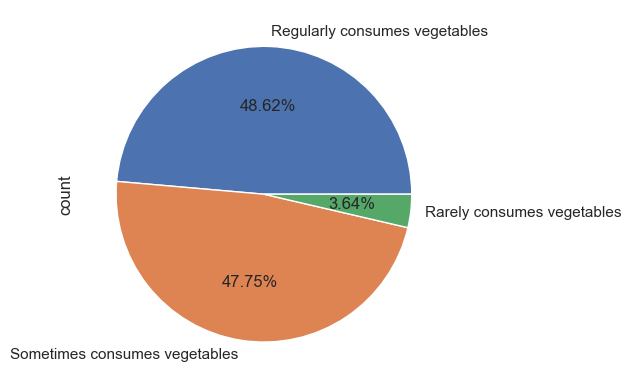

In [47]:
train_df['FCVC_classes'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

-------------------------------

In [61]:
train_df['NCP'].value_counts()

NCP
3.000000    14706
1.000000     1976
4.000000      715
2.993623       39
2.695396       25
            ...  
2.818026        1
1.164839        1
2.152733        1
2.814518        1
2.705445        1
Name: count, Length: 689, dtype: int64

##### Transform values in column **NCP** with **round** function

In [62]:
train_df['NCP'] = train_df['NCP'].apply(lambda x : round(x))
test_df['NCP'] = test_df['NCP'].apply(lambda x : round(x))

In [63]:
train_df['NCP'].value_counts()

NCP
3    16309
1     2510
4     1040
2      899
Name: count, dtype: int64

#### Extracting new column **[NCP_classes]** from **[NCP]**

In [64]:
def fncp(m):
    m = int(m)
    if m == 1:
        return 'One meal per day'
    if m == 2:
        return 'Two meals per day'
    if m == 3:
        return 'Three meals per day'
    if m == 4:
        return 'More than three meals'

train_df['NCP_classes'] = train_df['NCP'].apply(lambda x : fncp(x))

In [65]:
def fncp(m):
    m = int(m)
    if m == 1:
        return 'One meal per day'
    if m == 2:
        return 'Two meals per day'
    if m == 3:
        return 'Three meals per day'
    if m == 4:
        return 'More than three meals'
test_df['NCP_classes'] =test_df['NCP'].apply(lambda x : fncp(x))

In [66]:
train_df['NCP_classes'].value_counts()

NCP_classes
Three meals per day      16309
One meal per day          2510
More than three meals     1040
Two meals per day          899
Name: count, dtype: int64

In [67]:
test_df['NCP_classes'].value_counts()

NCP_classes
Three meals per day      10839
One meal per day          1710
More than three meals      652
Two meals per day          639
Name: count, dtype: int64

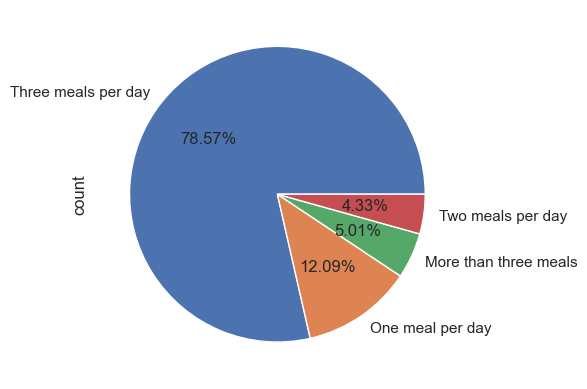

In [68]:
train_df['NCP_classes'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

------------------------

In [69]:
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,FCVC_classes,NCP_classes
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2,3,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,Sometimes consumes vegetables,Three meals per day
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2,3,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,Sometimes consumes vegetables,Three meals per day
2,2,Female,18.000000,1.711460,50.165754,yes,yes,2,1,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,Sometimes consumes vegetables,One meal per day
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3,3,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,Regularly consumes vegetables,Three meals per day
4,4,Male,31.641081,1.914186,93.798055,yes,yes,3,2,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,Regularly consumes vegetables,Two meals per day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,3,3,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,Regularly consumes vegetables,Three meals per day
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3,4,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,Regularly consumes vegetables,More than three meals
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2,3,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,Sometimes consumes vegetables,Three meals per day
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,3,2,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II,Regularly consumes vegetables,Two meals per day


## Transform Data

In [49]:
# label = LabelEncoder()

In [50]:
# obj = train_df.select_dtypes(include='object')
# non_obj = train_df.select_dtypes(exclude='object')

In [51]:
# for col in range(0,obj.shape[1]):
#     obj.iloc[:,col]=label.fit_transform(obj.iloc[:,col])
# obj= obj.astype(int)

In [52]:
# df=pd.concat([non_obj,obj],axis=1)

In [53]:
# df.info()

In [54]:
# test_df.head()

In [55]:
# # for test
# objj = test_df.select_dtypes(include='object')
# non_objj = test_df.select_dtypes(exclude='object')

In [56]:
# # for test
# for col in range(0,objj.shape[1]):
#     objj.iloc[:,col]=label.fit_transform(objj.iloc[:,col])
# objj= objj.astype(int)

In [57]:
# df2= pd.concat([non_objj,objj],axis=1)

In [58]:
# scaler=StandardScaler()

In [59]:
# # for train
# sc1=df[['Age']]
# sc2=df[['Weight']]
# df['Age']=scaler.fit_transform(sc1)
# df['Weight']=scaler.fit_transform(sc2)

In [60]:
# # for test 
# sc1=df2[['Age']]
# sc2=df2[['Weight']]
# df2['Age']=scaler.fit_transform(sc1)
# df2['Weight']=scaler.fit_transform(sc2)

## Creating model with neural networks